## Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

## Pre-processing
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

In [184]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics
import matplotlib.patches as mpatches

In [185]:
# Set up the data
data = "../data/"
train = "datasets/clean_train.csv"
test = "datasets/test.csv"

In [186]:
#Read in the data
train_df = pd.read_csv(data+train)
test_df = pd.read_csv(data+test)

In [187]:
# Features chosen in EDA and cleaning
features =['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual']
# Set up X-features and our y-target from the train_df to feed into regression models
X = train_df[features]
y_actual = train_df['SalePrice']
train_df['SalePrice_log'] = np.log(train_df.SalePrice)
y_log = train_df['SalePrice_log']

In [188]:
# Verify dimensions in X and y represent an equal number of observations in each, n = No. of rows
print('X:        ', X.shape) # X.shape equals (n,p)
print('y_actual: ', y_actual.shape) # y.shape equals (n, null)

X:         (2049, 7)
y_actual:  (2049,)


In [189]:
# Check that everything is copacetic.
X.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual
0,2005,1976,725,725.0,475.0,1479,6
1,1997,1996,913,913.0,559.0,2122,7
2,2007,1953,1057,1057.0,246.0,1057,5


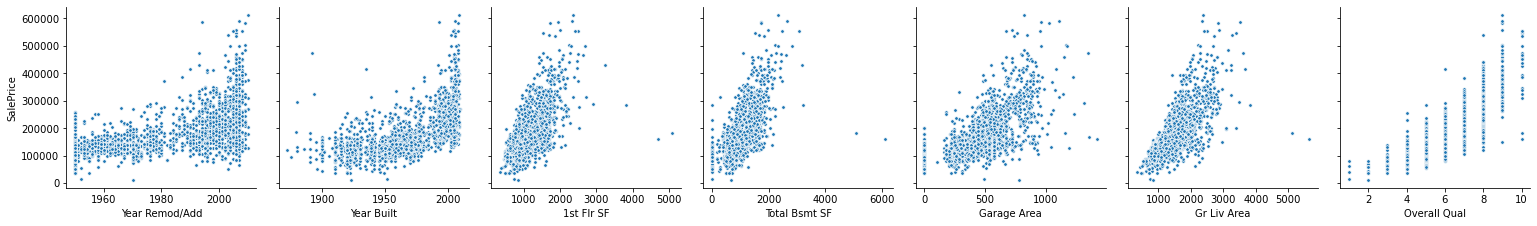

In [190]:
#sns.pairplot(df);
sns.pairplot(train_df, x_vars=features, y_vars=['SalePrice'],height=3,plot_kws={"s": 13});

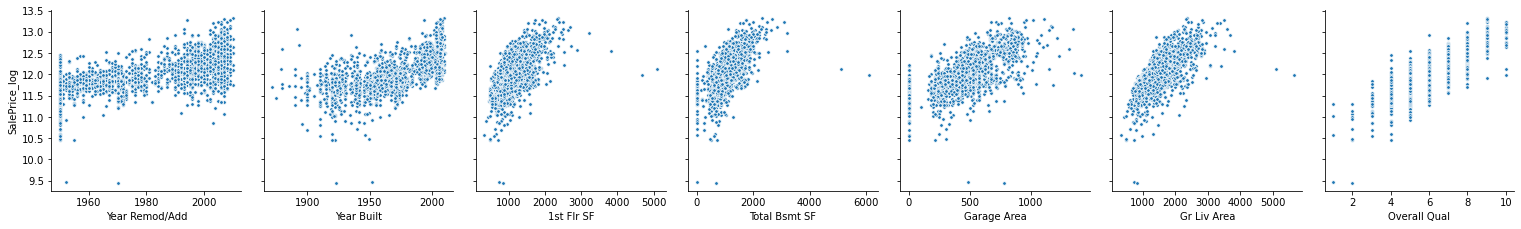

In [191]:
#sns.pairplot(df);
sns.pairplot(train_df, x_vars=features, y_vars=['SalePrice_log'],height=3,plot_kws={"s": 13});

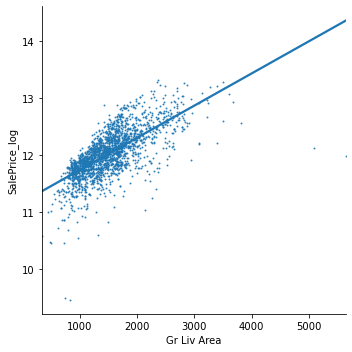

In [192]:
sns.lmplot(x='Gr Liv Area', y='SalePrice_log', data=train_df, 
           ci=False, fit_reg=True,scatter_kws={"s": 1});

C:\Users\bgrif\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


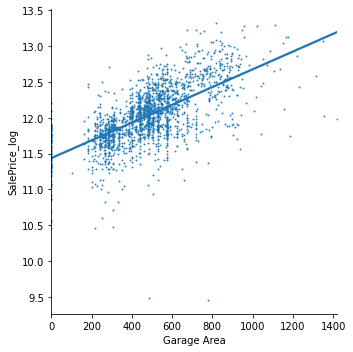

In [193]:
sns.lmplot(x='Garage Area', y='SalePrice_log', data=train_df, 
           ci=False, fit_reg=True, size=5,scatter_kws={"s": 1});

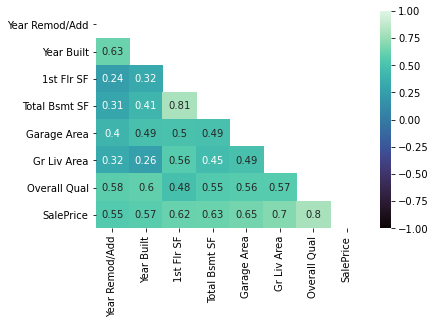

In [194]:
corr = train_df[['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual', 'SalePrice']].corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, cmap = 'mako', annot = True, vmin=-1, vmax=1);

##### Model 1 Features: ['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual']

In [195]:
X.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual
0,2005,1976,725,725.0,475.0,1479,6
1,1997,1996,913,913.0,559.0,2122,7
2,2007,1953,1057,1057.0,246.0,1057,5


In [196]:
#Scale the X-data (convert features into Z-scores = [X-mean(X)] / std(X))
ss = StandardScaler()
ss.fit(X)
Z = ss.transform(X)
#Z_test = ss.transform(X_test)

In [197]:
Z_df = pd.DataFrame(Z)
Z = Z_df.rename(columns={0: "Year Remod/Add",
                            1: "Year Built", 
                            2: "1st Flr SF",
                            3: "Total Bsmt SF",
                            4: "Garage Area",
                            5: "Gr Liv Area",
                            6: "Overall Qual"})

In [198]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
Z_train, Z_test, y_train, y_test = train_test_split(Z, y_actual, random_state=42)

##### Model 2 Features: ['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual', 'class']

In [199]:
#Scale the X-data (convert features into Z-scores = [X-mean(X)] / std(X))
ss2 = StandardScaler()
ss2.fit(X)
Z2 = ss2.transform(X)

In [200]:
Z2_df = pd.DataFrame(Z2)
Z2 = Z2_df.rename(columns={0: "Year Remod/Add",
                            1: "Year Built", 
                            2: "1st Flr SF",
                            3: "Total Bsmt SF",
                            4: "Garage Area",
                            5: "Gr Liv Area",
                            6: "Overall Qual"})

In [201]:
# Check that everything is copacetic
Z2.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual
0,0.989304,0.141070,-1.109111,-0.741195,0.005715,-0.040900,-0.079763
1,0.608810,0.804184,-0.634924,-0.322849,0.394798,1.244226,0.621675
2,1.084428,-0.621512,-0.271718,-0.002414,-1.055000,-0.884327,-0.781201


In [202]:
#One-hot encode categorical variables.
class_dummy = pd.get_dummies( data=train_df[['NeighborhoodC']], columns= [ 'NeighborhoodC' ], drop_first=True)

In [203]:
train_df['NeighborhoodC'].head()

0    1
1    0
2    0
3    0
4    0
Name: NeighborhoodC, dtype: int64

In [204]:
# Concatenate scaled-numerical and encoded-categorical data for testing
Z2 = pd.concat([Z2,class_dummy], axis=1)

In [205]:
# create a features list for future reference
features2 = list(Z2.columns)

In [206]:
# Check that everything is copacetic
Z2.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,NeighborhoodC_1,NeighborhoodC_2
0,0.989304,0.141070,-1.109111,-0.741195,0.005715,-0.040900,-0.079763,1,0
1,0.608810,0.804184,-0.634924,-0.322849,0.394798,1.244226,0.621675,0,0
2,1.084428,-0.621512,-0.271718,-0.002414,-1.055000,-0.884327,-0.781201,0,0


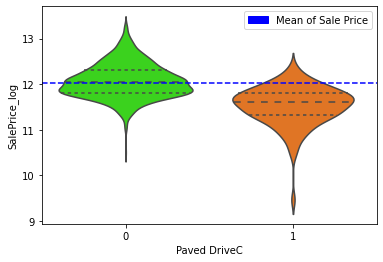

In [207]:
sns.violinplot("Paved DriveC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

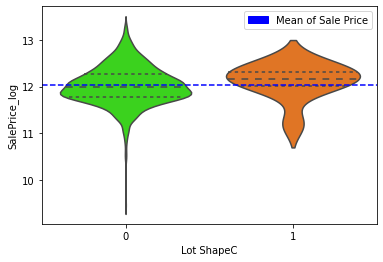

In [208]:
sns.violinplot("Lot ShapeC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

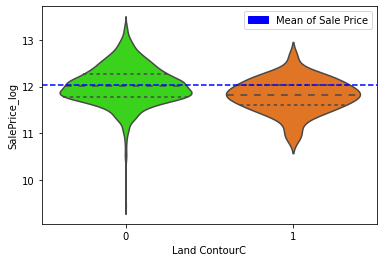

In [209]:
sns.violinplot("Land ContourC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

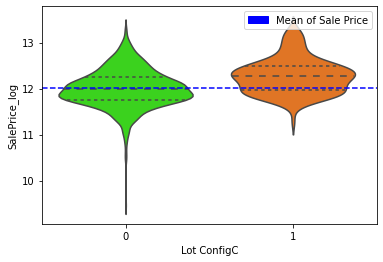

In [210]:
sns.violinplot("Lot ConfigC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

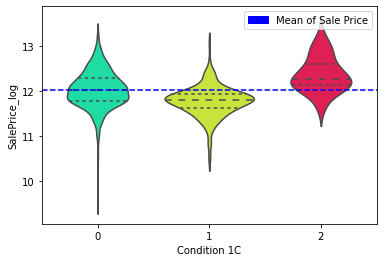

In [211]:
sns.violinplot("Condition 1C", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

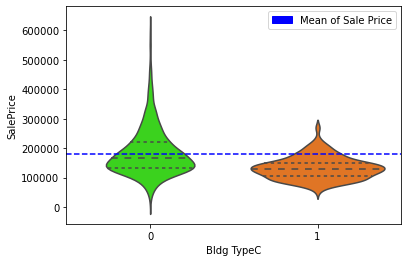

In [212]:
sns.violinplot("Bldg TypeC", "SalePrice", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

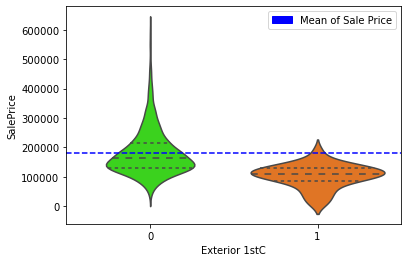

In [213]:
sns.violinplot("Exterior 1stC", "SalePrice", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

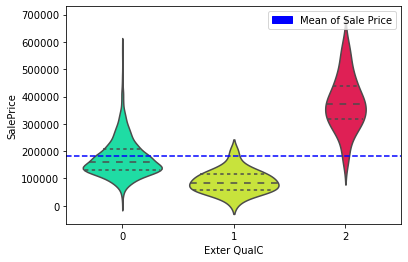

In [214]:
sns.violinplot("Exter QualC", "SalePrice", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

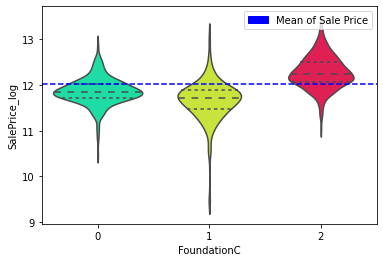

In [215]:
sns.violinplot("FoundationC", "SalePrice_log", data=train_df, palette='gist_ncar',inner="quartile");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="blue", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

In [216]:
## sns.lmplot(x='Gr Liv Area', y='SalePrice', data=train_df,ci=False, hue='class');

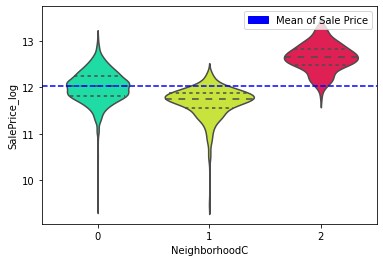

In [217]:
sns.violinplot("NeighborhoodC", "SalePrice_log", data=train_df, palette='gist_ncar', inner='quartile');
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="b", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

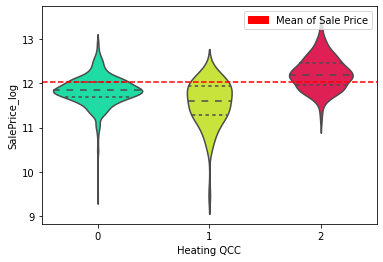

In [218]:
sns.violinplot("Heating QCC", "SalePrice_log", data=train_df, palette='gist_ncar', inner='quartile');
plt.axhline(train_df['SalePrice_log'].mean(), color="red", linestyle = '--');"box", "quartile", "point", "stick"
label_patch = mpatches.Patch(color="red", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

C:\Users\bgrif\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


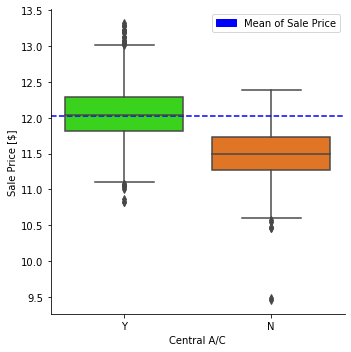

In [219]:
g = sns.factorplot('Central Air','SalePrice_log', data=train_df, kind="box",palette='gist_ncar')
g.set_axis_labels("Central A/C", "Sale Price [$]");
plt.axhline(train_df['SalePrice_log'].mean(), color="blue", linestyle = '--');
label_patch = mpatches.Patch(color="b", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

C:\Users\bgrif\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


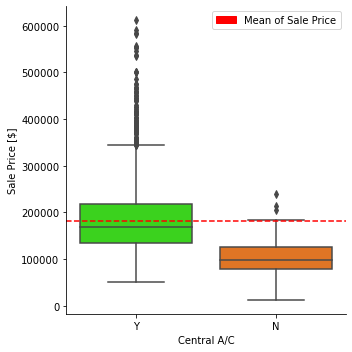

In [220]:
g = sns.factorplot('Central Air','SalePrice', data=train_df, kind="box",palette='gist_ncar')
g.set_axis_labels("Central A/C", "Sale Price [$]");
plt.axhline(train_df['SalePrice'].mean(), color="red", linestyle = '--');
label_patch = mpatches.Patch(color="red", label='Mean of Sale Price')
plt.legend(handles=[label_patch]);

In [221]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
Z_train2, Z_test2, y_train2, y_test2 = train_test_split(Z, y_actual, random_state=42)

##### Model 3:

In [222]:
cat_features = ['Paved DriveC',
                 'Lot ShapeC',
                 'Land ContourC',
                 'Lot ConfigC',
                 'Condition 1C',
                 'Bldg TypeC',
                 'Exterior 1stC',
                 'Exter QualC',
                 'FoundationC',
                 'Heating QCC',
                 'Central AirC']

In [223]:
#One-hot encode categorical variables.
Z3 = Z2.copy()
for col in cat_features:
    cat_dummy = pd.get_dummies(data=train_df[[col]], columns= [col], drop_first=True)
    Z3 = pd.concat([Z3, cat_dummy],axis=1)

In [224]:
Z3.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,NeighborhoodC_1,NeighborhoodC_2,Paved DriveC_1,...,Condition 1C_2,Bldg TypeC_1,Exterior 1stC_1,Exter QualC_1,Exter QualC_2,FoundationC_1,FoundationC_2,Heating QCC_1,Heating QCC_2,Central AirC_1
0,0.989304,0.141070,-1.109111,-0.741195,0.005715,-0.040900,-0.079763,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.608810,0.804184,-0.634924,-0.322849,0.394798,1.244226,0.621675,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1.084428,-0.621512,-0.271718,-0.002414,-1.055000,-0.884327,-0.781201,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
Z_train3, Z_test3, y_train3, y_test3 = train_test_split(Z3, y_actual, random_state=42)

In [226]:
# Keep a list of model 3 features for clarity
features3 = list(Z3.columns)

##### Model 4: Same as Model 3, but with log(y)-target ('SalePrice') 

In [227]:
y_log = np.log(y_actual)

In [228]:
#Train/Test-Split the data from train_df, default: train_size = 0.25, test_size = 0.75
Z_train4, Z_test4, y_train4, y_test4 = train_test_split(Z3, y_log, random_state=42)

In [231]:
# Use IPython magic command %store to pass scaled & Test/Train-Split variables to Notebook: 03_Model_Benchmarks for model validation
# Got help from Stack Overflow on sharing variables between notebooks
#<https://stackoverflow.com/questions/31621414/share-data-between-ipython-notebooks>

# Model 1 Variables
#%store X_train
#%store X_test

%store Z_train
%store Z_test
%store y_train
%store y_test
%store features

# Model 2 Variables
%store Z_train2
%store Z_test2
%store y_train2
%store y_test2
%store features2

# Model 3 Variables
%store Z_train3
%store Z_test3
%store y_train3
%store y_test3
%store features3

# Model 4 Variables
%store Z_train4
%store Z_test4
%store y_train4
%store y_test4

Stored 'Z_train' (DataFrame)
Stored 'Z_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'features' (list)
Stored 'Z_train2' (DataFrame)
Stored 'Z_test2' (DataFrame)
Stored 'y_train2' (Series)
Stored 'y_test2' (Series)
Stored 'features2' (list)
Stored 'Z_train3' (DataFrame)
Stored 'Z_test3' (DataFrame)
Stored 'y_train3' (Series)
Stored 'y_test3' (Series)
Stored 'features3' (list)
Stored 'Z_train4' (DataFrame)
Stored 'Z_test4' (DataFrame)
Stored 'y_train4' (Series)
Stored 'y_test4' (Series)


In [ ]:
#Consider using automated feature selection.